### CE 103- INTRODUCTION TO COMPUTERS and PROGRAMMING

### _The topics of the week !_

- PANDAS
    - Data Structures in Pandas
    - Data Manipulation
    - Import/Export Data 
    - Time Series Analysis
    - Visualization
    


Pandas (derived from the term "Panel Data") stands for “Python Data Analysis Library”, which is most preferred and widely used library of Python. Its very helpful tool especially for Data Scientists and Analysts, and its built on top of the NumPy package just as SciPy does.


In [1]:
import pandas as pd
import numpy as np

---
# DATA STRUCTURES


> ## 1. Series(1D)

A one-dimensional labeledarray which can be in integer, string, python object etc. format. The axis labels are referred as index.

> s = pd.Series(data, index = index)

In [2]:
greetings = pd.Series([1, 2, 3], index = ['Good Morning','Good Afternoon','Good Evening'])
print(greetings)

Good Morning      1
Good Afternoon    2
Good Evening      3
dtype: int64


In [3]:
mixed = np.array([3,5,7,9,11,13,15])
s = pd.Series(mixed)        # create a pandas series by using Numpy Array
s

0     3
1     5
2     7
3     9
4    11
5    13
6    15
dtype: int64

In [4]:
s.itemsize    # number of bytes allocated to each item

8

In [5]:
greetings.shape  # gets shape of the series

(3,)

In [6]:
greetings.count()  # counts values of array

3

In [7]:
greetings.values  # gets values of array

array([1, 2, 3])

In [8]:
greetings.index  # indexing the array values

Index(['Good Morning', 'Good Afternoon', 'Good Evening'], dtype='object')

In [9]:
# create series from list with missing data

s1 = pd.Series([1,3,5,np.nan,9], index = ['a','b','c','d','e'])   
s1

a    1.0
b    3.0
c    5.0
d    NaN
e    9.0
dtype: float64

In [10]:
# create series with random and range fucntions

rows = np.random.rand(15)
columns = np.arange(0,15)
s = pd.Series(rows, columns)
rows, columns

(array([0.85367719, 0.48903234, 0.5654821 , 0.88266364, 0.30271185,
        0.08218237, 0.38311858, 0.16317462, 0.3233051 , 0.48642493,
        0.35419237, 0.2156008 , 0.70200001, 0.74697312, 0.77639945]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [11]:
s

0     0.853677
1     0.489032
2     0.565482
3     0.882664
4     0.302712
5     0.082182
6     0.383119
7     0.163175
8     0.323305
9     0.486425
10    0.354192
11    0.215601
12    0.702000
13    0.746973
14    0.776399
dtype: float64

In [12]:
# slicing values from series
s[:]
s[0:5]
s[-3:-1]

12    0.702000
13    0.746973
dtype: float64

In [13]:
# create series from dictionary

dictionary ={ "LectureCodes" : ["GTU_CE103","GTU_CE105","GTU_CE247"],  # create a dictionary to convert json object
              "Avg_StudentPerLecture" : 75, 
              "NumberOfClass" : 12 
            }
s2 = pd.Series(dictionary)
s2

Avg_StudentPerLecture                                   75
LectureCodes             [GTU_CE103, GTU_CE105, GTU_CE247]
NumberOfClass                                           12
dtype: object

In [14]:
# append series

s3 = s2.append(s)
s3

Avg_StudentPerLecture                                   75
LectureCodes             [GTU_CE103, GTU_CE105, GTU_CE247]
NumberOfClass                                           12
0                                                 0.853677
1                                                 0.489032
2                                                 0.565482
3                                                 0.882664
4                                                 0.302712
5                                                0.0821824
6                                                 0.383119
7                                                 0.163175
8                                                 0.323305
9                                                 0.486425
10                                                0.354192
11                                                0.215601
12                                                   0.702
13                                                0.7469

In [15]:
# delete item from series

s3.drop('NumberOfClass', inplace = True)
s3

Avg_StudentPerLecture                                   75
LectureCodes             [GTU_CE103, GTU_CE105, GTU_CE247]
0                                                 0.853677
1                                                 0.489032
2                                                 0.565482
3                                                 0.882664
4                                                 0.302712
5                                                0.0821824
6                                                 0.383119
7                                                 0.163175
8                                                 0.323305
9                                                 0.486425
10                                                0.354192
11                                                0.215601
12                                                   0.702
13                                                0.746973
14                                                0.7763

In [16]:
# delete item from series

s3.drop(7, inplace = True)
s3

Avg_StudentPerLecture                                   75
LectureCodes             [GTU_CE103, GTU_CE105, GTU_CE247]
0                                                 0.853677
1                                                 0.489032
2                                                 0.565482
3                                                 0.882664
4                                                 0.302712
5                                                0.0821824
6                                                 0.383119
8                                                 0.323305
9                                                 0.486425
10                                                0.354192
11                                                0.215601
12                                                   0.702
13                                                0.746973
14                                                0.776399
dtype: object

In [17]:
# operations with series

a, b = np.array([3,5,7,9]),np.array([2,4,6,8])
s1 = pd.Series(a) 
s2 = pd.Series(b)
s1 , s2

(0    3
 1    5
 2    7
 3    9
 dtype: int64, 0    2
 1    4
 2    6
 3    8
 dtype: int64)

In [18]:
s1.add(s2) # add series to each other
s1.add(10) # add fix number to all values in the series
s1.mul(s2) # multiply two series with each other
s1.div(s2) # division of series

0    1.500000
1    1.250000
2    1.166667
3    1.125000
dtype: float64

In [19]:
s1.max()
s2.mean()
s1.median()

6.0

> ## 2. Dataframe (2D)

It is a 2-dimensional labeled data structure with different types of columns. Dataframe is main object in pandas which used to represent data with rows and columns such as excel spreadsheets.

In [20]:
# create a dataframe 

df = pd.DataFrame()
df

""


In [21]:
# create a dataframe using list

consump_df = pd.DataFrame(['monday','wednesday','friday', 'sunday']) 
consump_df

,0
0,monday
1,wednesday
2,friday
3,sunday


In [22]:
# add columns to an existing dataframe

shop_lst = ['milk','bread','egg','newspaper']
consump_df[1] = shop_lst
consump_df[2] = [3, 2, 4, 8] 
consump_df

,0,1,2
0,monday,milk,3
1,wednesday,bread,2
2,friday,egg,4
3,sunday,newspaper,8


In [23]:
# Assign header information to each column

consump_df.columns = ['Service Days', 'Cart List', 'Cost in $']
consump_df

,Service Days,Cart List,Cost in $
0,monday,milk,3
1,wednesday,bread,2
2,friday,egg,4
3,sunday,newspaper,8


In [24]:
# call data with columns or raws

#consump_df.columns
consump_df.index

RangeIndex(start=0, stop=4, step=1)

In [25]:
consump_df['Service Days']

0       monday
1    wednesday
2       friday
3       sunday
Name: Service Days, dtype: object

In [26]:
# create a new column by assigning a column that does not exist

consump_df['Customer Name'] = ['Aylin','Hasan','Murat','Selin']
consump_df

,Service Days,Cart List,Cost in $,Customer Name
0,monday,milk,3,Aylin
1,wednesday,bread,2,Hasan
2,friday,egg,4,Murat
3,sunday,newspaper,8,Selin


In [27]:
# delete column from dataframe

del consump_df['Cart List']
consump_df

,Service Days,Cost in $,Customer Name
0,monday,3,Aylin
1,wednesday,2,Hasan
2,friday,4,Murat
3,sunday,8,Selin


In [28]:
# colomn to raw switch

consump_df.T

,0,1,2,3
Service Days,monday,wednesday,friday,sunday
Cost in $,3,2,4,8
Customer Name,Aylin,Hasan,Murat,Selin


In [29]:
# Data selection in dataframe usinf row label

consump_df.loc[2]                                                                                                                                                          

Service Days     friday
Cost in $             4
Customer Name     Murat
Name: 2, dtype: object

> ## 3. Indexing

Indexing refers to select specific rows and columns of data from a dataframe. It can handle different combination of row-column selection. 

In [30]:
shift_df = pd.DataFrame(np.random.randn(5, 4), index=None, columns=['Site A', 'Site B', 'Site C', 'Site D'])
shift_df

,Site A,Site B,Site C,Site D
0,-0.824908,-0.863627,0.617487,-0.434641
1,-0.748073,-0.519830,0.886125,0.056627
2,-0.701944,0.891882,0.805625,-1.210873
3,0.133452,1.712669,1.144546,0.989537
4,1.722475,0.565053,-0.362795,0.990784


In [31]:
# multi-index level

s = pd.Series(np.random.rand(3), index = [['a','b','c'],[3,5,8]])
s.index.names = ['name','number']
s

name  number
a     3         0.877464
b     5         0.475814
c     8         0.814118
dtype: float64

In [32]:
s['a']  # select a row

number
3    0.877464
dtype: float64

In [33]:
df5 = pd.DataFrame(np.random.randn(6, 4), index=list('abcdef'), columns=list('ABCD'))
df5

,A,B,C,D
a,0.333430,2.124389,-0.439472,0.130821
b,-1.003016,-0.598066,-0.313325,-0.614024
c,-1.412698,-0.524505,0.029824,0.087849
d,0.975430,0.732727,2.118984,0.251573
e,-0.394672,0.162740,0.605073,-0.883235
f,-1.212178,-0.153134,-2.431189,0.106837


In [34]:
df5.loc['e':, 'C':'D']  # select specific rows and columns

,C,D
e,0.605073,-0.883235
f,-2.431189,0.106837


---
# NaN vs Null 

NaN or None are not number, they meen missing/not available data. In databases _**pd.notnull()**_ or _**df.isnull()**_ are very usefull to detect missing data.

In [35]:
s = pd.Series([1,3,5,np.nan,9],[np.nan,np.NaN,8,9,10])
s

NaN      1.0
NaN      3.0
 8.0     5.0
 9.0     NaN
 10.0    9.0
dtype: float64

In [36]:
s.isnull()

NaN      False
NaN      False
 8.0     False
 9.0      True
 10.0    False
dtype: bool

In [37]:
s.dropna()

NaN      1.0
NaN      3.0
 8.0     5.0
 10.0    9.0
dtype: float64

In [38]:
s.fillna(33)

NaN       1.0
NaN       3.0
 8.0      5.0
 9.0     33.0
 10.0     9.0
dtype: float64

In [39]:
s.fillna('hello')

NaN          1
NaN          3
 8.0         5
 9.0     hello
 10.0        9
dtype: object

---
# IMPORT DATA

In [40]:
# read csv file from storage

df_tuik = pd.read_csv('Data_Input/tuik.csv', sep = '|')  # read csv file with delimiter "|"
df_tuik

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Sütunlar,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Satırlar,NaN,NaN,Türkiye-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,İnşaat Faaliyetleri Endeksi (Son 3 Aylık Dönem...,Ölçüm bazında,2011.0,NaN,-1.94,-1.41,-1.3,-0.78,-0.42,4.13,-2.81,-1.96,2.97,-3.89,4.54,NaN
4,NaN,NaN,2012.0,-4.25,-2.19,-4.24,8.31,1.14,1.58,-5.35,0.02,-0.18,-0.98,-4.06,-2.51,NaN
5,NaN,NaN,2013.0,1.24,2.89,6.72,-3.98,-2.69,-1.36,2.59,0.29,1.69,-3.96,3.59,-1.79,NaN
6,NaN,NaN,2014.0,1.67,-2.32,-1.75,-1.42,-1.13,0.74,-0.54,-0.03,1.12,1.13,2.4,-3.67,NaN
7,NaN,NaN,2015.0,1.13,2.75,-0.65,-2.27,2.51,-1.86,-1.67,1.64,-1.93,0.06,1.01,2.93,NaN
8,NaN,NaN,2016.0,-0.91,-2.58,7.33,1.78,-10.87,-1.94,9.08,-5.38,5.9,-5.58,-3.13,-4.26,NaN
9,NaN,NaN,2017.0,-0.99,2.85,5.95,2.36,6.07,-0.79,-2.51,5.02,-8.0,1.77,-0.04,-0.2,NaN


In [41]:
df_tuik = df_tuik.rename(columns = {'Unnamed: 2':'YEAR'}) # change the column name
df_tuik.head()

,Unnamed: 0,Unnamed: 1,YEAR,Sütunlar,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Satırlar,NaN,NaN,Türkiye-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,İnşaat Faaliyetleri Endeksi (Son 3 Aylık Dönem...,Ölçüm bazında,2011.0,NaN,-1.94,-1.41,-1.3,-0.78,-0.42,4.13,-2.81,-1.96,2.97,-3.89,4.54,NaN
4,NaN,NaN,2012.0,-4.25,-2.19,-4.24,8.31,1.14,1.58,-5.35,0.02,-0.18,-0.98,-4.06,-2.51,NaN


In [42]:
df_tuik.loc[df_tuik['YEAR'] == 2011]  # indexing rows and columns

,Unnamed: 0,Unnamed: 1,YEAR,Sütunlar,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
3,İnşaat Faaliyetleri Endeksi (Son 3 Aylık Dönem...,Ölçüm bazında,2011.0,NaN,-1.94,-1.41,-1.3,-0.78,-0.42,4.13,-2.81,-1.96,2.97,-3.89,4.54,NaN
13,İnşaat Sektörü Güven Endeksi-Mevsim Etkilerind...,Ölçüm bazında,2011.0,NaN,-0.91,-8.45,7.78,0.35,1.08,2.57,-5.64,1.49,0.86,-2.15,1.05,NaN


In [43]:
df_tuik_new = df_tuik.loc[(df_tuik['YEAR'] >= 2000) & (df_tuik['YEAR'] <= 2020)] # indexing
df_tuik_new

,Unnamed: 0,Unnamed: 1,YEAR,Sütunlar,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
3,İnşaat Faaliyetleri Endeksi (Son 3 Aylık Dönem...,Ölçüm bazında,2011.0,NaN,-1.94,-1.41,-1.3,-0.78,-0.42,4.13,-2.81,-1.96,2.97,-3.89,4.54,NaN
4,NaN,NaN,2012.0,-4.25,-2.19,-4.24,8.31,1.14,1.58,-5.35,0.02,-0.18,-0.98,-4.06,-2.51,NaN
5,NaN,NaN,2013.0,1.24,2.89,6.72,-3.98,-2.69,-1.36,2.59,0.29,1.69,-3.96,3.59,-1.79,NaN
6,NaN,NaN,2014.0,1.67,-2.32,-1.75,-1.42,-1.13,0.74,-0.54,-0.03,1.12,1.13,2.4,-3.67,NaN
7,NaN,NaN,2015.0,1.13,2.75,-0.65,-2.27,2.51,-1.86,-1.67,1.64,-1.93,0.06,1.01,2.93,NaN
8,NaN,NaN,2016.0,-0.91,-2.58,7.33,1.78,-10.87,-1.94,9.08,-5.38,5.9,-5.58,-3.13,-4.26,NaN
9,NaN,NaN,2017.0,-0.99,2.85,5.95,2.36,6.07,-0.79,-2.51,5.02,-8.0,1.77,-0.04,-0.2,NaN
10,NaN,NaN,2018.0,2.07,0.68,-4.58,-3.26,-5.66,-5.17,1.6,-6.81,-18.34,1.73,-4.14,-0.04,NaN
11,NaN,NaN,2019.0,-8.57,10.04,7.99,-8.37,-3.7,-3.53,6.6,5.11,7.52,8.46,-0.54,11.17,NaN
12,NaN,NaN,2020.0,5.24,6.61,-3.45,-34.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
data_df = df_tuik_new.dropna(axis='columns')  # delete columns with NaN values
data_df

,YEAR,Unnamed: 4,Unnamed: 5,Unnamed: 6
3,2011.0,-1.94,-1.41,-1.3
4,2012.0,-2.19,-4.24,8.31
5,2013.0,2.89,6.72,-3.98
6,2014.0,-2.32,-1.75,-1.42
7,2015.0,2.75,-0.65,-2.27
8,2016.0,-2.58,7.33,1.78
9,2017.0,2.85,5.95,2.36
10,2018.0,0.68,-4.58,-3.26
11,2019.0,10.04,7.99,-8.37
12,2020.0,6.61,-3.45,-34.07


In [45]:
data_df.dtypes

YEAR          float64
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
dtype: object

In [46]:
data_df.to_csv('Data_Input/tuik_new.csv')  # write data_df to a new csv file 

 In order to write a data frame to an excel file you should import _**"ExcelWriter"**_ module, which you may need to install by using pip command.

> pip install XlsxWriter 

In [47]:
# lets write to excel file

writer = pd.ExcelWriter('Data_Input/tuik.xlsx', engine='xlsxwriter')
data_df.to_excel(writer, 'tuik_sheet')
writer.save()

In [48]:
# read from excel file

xl = pd.ExcelFile('Data_Input/tuik.xlsx')       # load spreadsheet
df1 = xl.parse('tuik_sheet')                    # assign sheet to the dataframe
df1

,YEAR,Unnamed: 4,Unnamed: 5,Unnamed: 6
3,2011,-1.94,-1.41,-1.30
4,2012,-2.19,-4.24,8.31
5,2013,2.89,6.72,-3.98
6,2014,-2.32,-1.75,-1.42
7,2015,2.75,-0.65,-2.27
8,2016,-2.58,7.33,1.78
9,2017,2.85,5.95,2.36
10,2018,0.68,-4.58,-3.26
11,2019,10.04,7.99,-8.37
12,2020,6.61,-3.45,-34.07


 Append new sheet to an existing excel file, we need to import (or even install) _**"openpyxl"**_ module because _**"xlswriter"**_ does not support append mode

In [49]:
# pip install --user openpyxl
import openpyxl
from openpyxl import load_workbook

path = pd.ExcelFile('Data_Input/tuik.xlsx')

df2 = pd.DataFrame({'Percentage': np.random.rand(20)})   # define a new dataframe

with pd.ExcelWriter('Data_Input/tuik.xlsx', engine = 'openpyxl', mode = 'a') as f:
    f.book = load_workbook('Data_Input/tuik.xlsx')
    df2.to_excel(f, 'tuik_NEW_sheet')

---
# DATA MANIPULATION

In [50]:
sales_df = pd.read_excel('Data_Input/sales.xlsx')
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [51]:
sales_df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [52]:
sales_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [53]:
sales_df.count()

Row ID           9994
Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit           9994
dtype: int64

In [54]:
filt_df = sales_df.drop('Row ID', axis = 1)
filt_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [55]:
s_df = sales_df.sort_values(by=['Sales'], ascending=False)
s_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856


In [56]:
s_df = sales_df.drop_duplicates('Region')
s_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196


In [57]:
s_df = sales_df.sort_values(by=['Ship Date'], ascending=True)
s_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7180,7181,CA-2014-106054,2014-01-06,2014-01-07,First Class,JO-15145,Jack O'Briant,Corporate,United States,Athens,...,30605,South,OFF-AR-10002399,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",12.780,3,0.0,5.2398
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
5327,5328,CA-2014-130813,2014-01-06,2014-01-08,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,...,90049,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.0,9.3312
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


---
# TIME SERIES ANALYSIS

Python library data types for date and time is 'datetime','time', 'calendar'; for Pandas its 'Timestamp'

In [58]:
from datetime import datetime
from matplotlib import dates

In [59]:
now = datetime.now()
now

datetime.datetime(2020, 5, 5, 20, 5, 11, 152613)

In [60]:
pd.date_range('20200310', periods=60)

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
               '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
      

In [61]:
# convert string to datetime
datetime.strptime('11/28/2005','%m/%d/%Y')

datetime.datetime(2005, 11, 28, 0, 0)

In [62]:
date_str = "10 march, 2020"
datetime.strptime(date_str, "%d %B, %Y")

datetime.datetime(2020, 3, 10, 0, 0)

In [63]:
print('Type :- ',type(now))

Type :-  <class 'datetime.datetime'>


In [64]:
now = datetime.now()
print('Hour: ', now.hour)
print('Minute: ', now.minute)

Hour:  20
Minute:  5


In [65]:
now.weekday()  # gets the day of the week

1

In [66]:
# dealing with time zone

from datetime import timezone

In [67]:
# UTC(Coordinated Universal Time) integer representing nanoseconds elapsed since midnight Thursday, January 1, 1970

loc_time = datetime.utcnow()   
loc_time

datetime.datetime(2020, 5, 5, 20, 5, 11, 324758)

In [68]:
ce103_final = datetime.utcfromtimestamp(159194043)   # defines nanoseconds from UTC to Final Exam date
ce103_final

datetime.datetime(1975, 1, 17, 12, 34, 3)

In [69]:
import calendar  # is also a helpful module to define date operations

In [70]:
calendar.day_name[ce103_final.weekday()]  # find the weekday of given timestamp

'Friday'

In [71]:
# Timespan and Time difference settlement

from datetime import timedelta

In [72]:
# get difference between two datetime objects

from datetime import timedelta

time_df = datetime(2020, 3, 10) + timedelta(60)  # adds 60 days to start time

In [73]:
timedelta(days = 130, hours = 21, minutes = 43) # gives day, seconds

datetime.timedelta(130, 78180)

In [74]:
# DateTime objects in Pandas

pd.to_datetime("26th of march, 2020")

Timestamp('2020-03-26 00:00:00')

In [75]:
pd.Timestamp(datetime(2020, 3, 26))

Timestamp('2020-03-26 00:00:00')

In [76]:
pd.Timestamp('2005-11-28')

Timestamp('2005-11-28 00:00:00')

In [77]:
pd.Timestamp(2012, 5, 1)

Timestamp('2012-05-01 00:00:00')

In [78]:
pd.Period('2011-01') 

Period('2011-01', 'M')

In [79]:
pd.Period('2012-05', freq='D')  # sets the frequency as Day

Period('2012-05-01', 'D')

In [80]:
# set series with random dates

pd.date_range('2005-10-18 20:02:55', periods=5, freq='D')

DatetimeIndex(['2005-10-18 20:02:55', '2005-10-19 20:02:55',
               '2005-10-20 20:02:55', '2005-10-21 20:02:55',
               '2005-10-22 20:02:55'],
              dtype='datetime64[ns]', freq='D')

In [81]:
[datetime(2012, 5, 1), datetime(2012, 5, 2), datetime(2012, 5, 3)]

[datetime.datetime(2012, 5, 1, 0, 0),
 datetime.datetime(2012, 5, 2, 0, 0),
 datetime.datetime(2012, 5, 3, 0, 0)]

In [82]:
pd.to_datetime([250, 4, 30], unit='D')

DatetimeIndex(['1970-09-08', '1970-01-05', '1970-01-31'], dtype='datetime64[ns]', freq=None)

In [83]:
pd.to_datetime([10, 20, 30], unit='D', origin=pd.Timestamp('1900-01-01'))

DatetimeIndex(['1900-01-11', '1900-01-21', '1900-01-31'], dtype='datetime64[ns]', freq=None)

In [84]:
pd.to_datetime([2903847.3, 3898373281, 190283749.9828374], unit='s')  # unit "s" refers to seconds

DatetimeIndex(['1970-02-03 14:37:27.300000',        '2093-07-14 01:28:01',
               '1976-01-12 08:35:49.982837'],
              dtype='datetime64[ns]', freq=None)

In [85]:
pd.to_datetime([2903847.3, 38942081, 190283749.9828374], unit='ns') 

DatetimeIndex(['1970-01-01 00:00:00.002903847',
               '1970-01-01 00:00:00.038942081',
               '1970-01-01 00:00:00.190283749'],
              dtype='datetime64[ns]', freq=None)

In [86]:
start = datetime(2020, 3, 10)
end = datetime.now()
pd.date_range(start, end) # default frequency for date_range is a calendar day

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
               '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
      

In [87]:
pd.bdate_range(start, end, freq='B')  # the default for bdate_range is a business day

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04',
               '2020-05-05'],
              dtype='datetime64[ns]', freq='B')

#### _**Timestamp Limitations**_

In [88]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [89]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

---
# VISUALIZATION

In [90]:
shipping_df = sales_df.drop_duplicates('Ship Date')
shipping_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [91]:
import matplotlib.pyplot as plt

shipping_df['Quantity'].hist(bins=15)

plt.xlabel('Quantity')
plt.ylabel('Number of Data')
labels = ["Quantity"]
plt.legend(labels)
plt.show()

<Figure size 640x480 with 1 Axes>

<BarContainer object of 1334 artists>

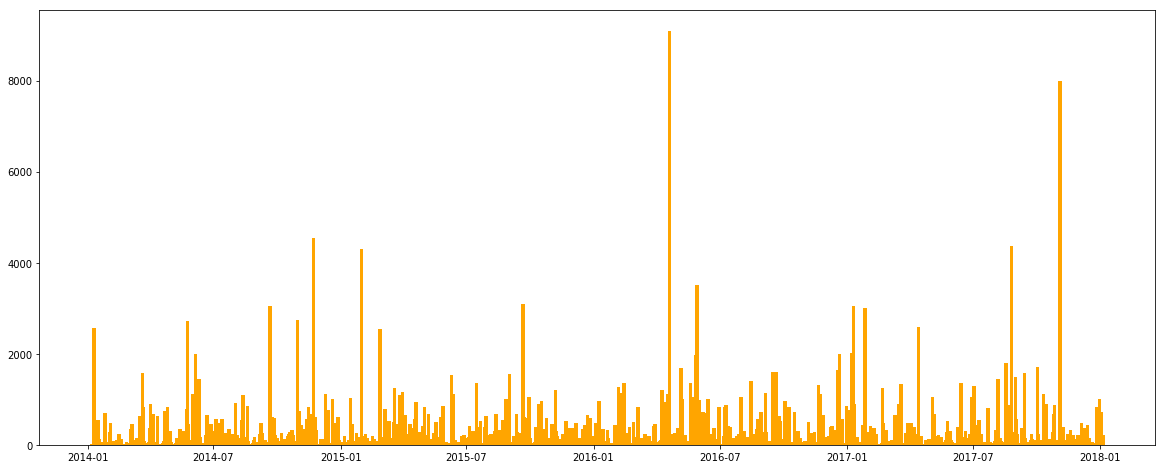

In [92]:
fig = plt.figure(figsize=(20, 8))
df_x = shipping_df['Ship Date'].tolist()
df_y = shipping_df['Sales'].tolist()
plt.bar(df_x,df_y, width=5, color='orange')

In [93]:
# lets define time random series with date index

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))


In [94]:
# lets define a random time series and visualize it

lockdown_df = pd.DataFrame(np.random.randn(1000,1)*np.sin(30), columns=['BrainCell'], index=pd.date_range('2020-03-10', periods = 1000, freq='T'))
df = lockdown_df.cumsum()
df

,BrainCell
2020-03-10 00:00:00,0.931255
2020-03-10 00:01:00,2.574469
2020-03-10 00:02:00,2.346783
2020-03-10 00:03:00,2.060846
2020-03-10 00:04:00,1.328759
2020-03-10 00:05:00,1.420804
2020-03-10 00:06:00,0.052628
2020-03-10 00:07:00,-0.041624
2020-03-10 00:08:00,-2.506166
2020-03-10 00:09:00,-0.659789


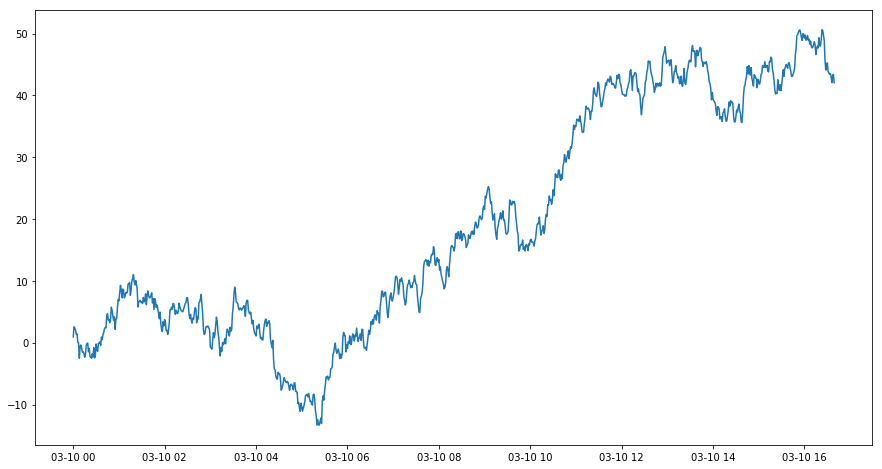

In [95]:
fig = plt.figure( figsize=(15, 8) )
plt.plot(df)

---
## Homework #10

Please follow the instructions below. 

1 - Visit the following web page and import dataset in excel format. https://data.ibb.gov.tr/dataset/ulasim-yonetim-merkezi-uym-tarafindan-sisteme-girilen-trafik-duyurulari/resource/02bfe245-5e5a-472b-b0a4-323d1bae8131

![](./Figures/homework10.png)

2 - Read the columns from the excel file ("UYM Duyurular" Sheet), classify them belongs to "Duyuru Tipi" column and draw histogram plot.

3 - Create new sheet in the same excel file named as "output" and write "Duyuru ID", "Duyuru Tipi", "Müdahale Tarihi" and "Koordinatlar" (seperate into two columns as "Enlem" and "Boylam") for only values labeled as "Kaza Bildirimi". Read these columns and plot a figure for Time vs Kaza Bildirimi.  

4 - Compute the time differernce between "Giriş Tarihi" and "Müdahale Tarihi" and calculate average time of intervene time per event. 


*** Be carefull about "NaN or Null values" in your data, they may disrupt your calculations.

PS : Do not forget to upload your answer sheets to CE_103 Class on MS Teams.
